In [1]:
import pandas as pd

# Construct the relative path to the CSV file
file_path = '../Data Cleaning/Data/tags-goodreads-english-popular-quotes.csv'

# Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print("First 5 rows of the dataframe:")
    print(df.head())
    print(f"\nShape of the dataframe: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


File loaded successfully!
First 5 rows of the dataframe:
                                               QUOTE  LIKES           AUTHOR  \
0  My life amounts to no more than one drop in a ...   4589   David Mitchell   
1  G. K. Chesterton once said that to be thankful...      2   Ravi Zacharias   
2  Contrary to popular belief, fantasy is not abo...      2  Terry Pratchett   
3  There is a limit to human charity," said Lady ...      2  G.K. Chesterton   
4  And the greatest of the poets, when he defined...      2  G.K. Chesterton   

                                               TITLE                      TAGS  
0                                        Cloud Atlas                        []  
1  Recapture the Wonder: Experiencing God's Amazi...                        []  
2      A Slip of the Keyboard: Collected Non-fiction                        []  
3                  The Penguin Complete Father Brown  ['crime', 'forgiveness']  
4                                The Everlasting Man     

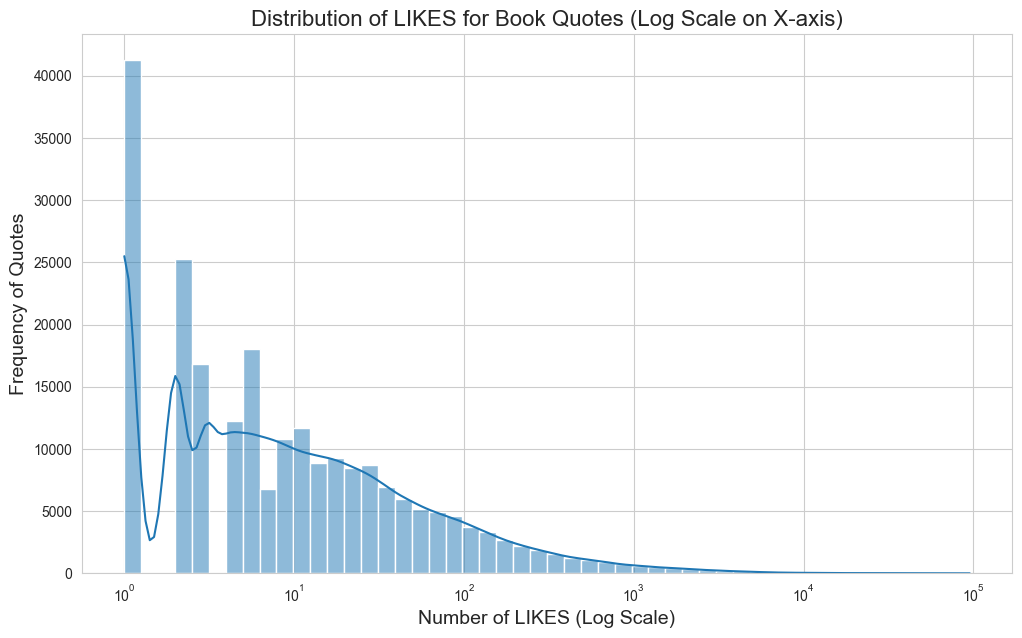


Descriptive statistics for 'LIKES':
count    227900.000000
mean         75.289263
std         701.581227
min           1.000000
25%           2.000000
50%           7.000000
75%          25.000000
max       95186.000000
Name: LIKES, dtype: float64

Selected Quantiles for 'LIKES':
0.100        1.000
0.250        2.000
0.500        7.000
0.750       25.000
0.900       95.000
0.950      217.000
0.990     1188.000
0.999     6451.101
1.000    95186.000
Name: LIKES, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

# Set the style for seaborn plots
sns.set_style('whitegrid')

# Ensure DataFrame 'df' and 'LIKES' column exist
if 'df' in locals() or 'df' in globals():
    if 'LIKES' in df.columns and pd.api.types.is_numeric_dtype(df['LIKES']):
        
        # --- Visualization with Log Scale ---
        plt.figure(figsize=(12, 7))


        sns.histplot(df[df['LIKES'] > 0]['LIKES'], kde=True, bins=50, log_scale=True) 
        
        plt.title('Distribution of LIKES for Book Quotes (Log Scale on X-axis)', fontsize=16)
        plt.xlabel('Number of LIKES (Log Scale)', fontsize=14)
        plt.ylabel('Frequency of Quotes', fontsize=14)

        plt.show()
        
        # --- Descriptive Statistics ---
        print("\nDescriptive statistics for 'LIKES':")
        print(df['LIKES'].describe())
        
        print("\nSelected Quantiles for 'LIKES':")
        # Shows the LIKES count at various percentile points
        quantiles_to_show = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 1.0]
        print(df['LIKES'].quantile(quantiles_to_show))

    elif 'LIKES' not in df.columns:
        print("Error: 'LIKES' column not found in the DataFrame.")
        print("Available columns are:", df.columns.tolist())
    else:
        print("Error: 'LIKES' column is present but not numeric. Please check the data type.")
        print(f"Data type of 'LIKES' column: {df['LIKES'].dtype}")
else:
    print("Error: DataFrame 'df' is not defined. Please load the data first using Code box 1.")


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure DataFrame 'df' and necessary columns exist
if 'df' in locals() or 'df' in globals():
    if 'AUTHOR' in df.columns and 'LIKES' in df.columns and pd.api.types.is_numeric_dtype(df['LIKES']):

        # Calculate average likes and number of quotes per author
        # We'll also count the number of quotes to give context (an author with one highly-liked quote vs. many well-liked ones)
        author_stats = df.groupby('AUTHOR')['LIKES'].agg(['mean', 'count', 'median', 'sum']).rename(
            columns={'mean': 'Average Likes', 'count': 'Number of Quotes', 'median': 'Median Likes', 'sum': 'Total Likes'}
        )

        # Sort authors by average likes in descending order
        top_authors_avg_likes = author_stats.sort_values(by='Average Likes', ascending=False)

        print("--- Top Authors by Average Likes (showing authors with at least 5 quotes for better reliability) ---")
        # Filter for authors with a reasonable number of quotes to make "average" more meaningful
        # Adjust min_quotes as you see fit
        min_quotes_threshold = 5 
        reliable_top_authors = top_authors_avg_likes[top_authors_avg_likes['Number of Quotes'] >= min_quotes_threshold]
        print(reliable_top_authors.head(15)) # Display top 15



    elif 'AUTHOR' not in df.columns:
        print("Error: 'AUTHOR' column not found in the DataFrame.")
    elif 'LIKES' not in df.columns or not pd.api.types.is_numeric_dtype(df['LIKES']):
        print("Error: 'LIKES' column is not found or is not numeric.")
    else:
        print("Error: DataFrame 'df' is not defined. Please load the data first.")
else:
    print("Error: DataFrame 'df' is not defined. Please load the data first using Code box 1.")


--- Top Authors by Average Likes (showing authors with at least 5 quotes for better reliability) ---
                               Average Likes  Number of Quotes  Median Likes  \
AUTHOR                                                                         
Lemony Snicket                   5295.800000                 5          48.0   
Friedrich Nietzsche              2645.827586                29         182.0   
Jane Austen                      2091.056000               125         574.0   
George Orwell                    2003.277778                36        1175.5   
Dr. Seuss                        1639.494737                95         217.0   
Mark Twain                       1347.200000                15           8.0   
Benjamin Alire Sáenz             1318.400000                15        1099.0   
Robert Frost                     1159.100000                10         229.0   
haruki murakami                  1084.375000                 8          93.0   
Tennessee Williams 

In [17]:
import pandas as pd # Ensure pandas is imported

# --- This code assumes 'df' (from Code Box 1) and 'author_stats' (from Code Box 3) exist ---
# --- Please ensure Code Box 1 and Code Box 3 have been run successfully before this one ---

authors_to_check = {
    "J.K. Rowling": "J.K. Rowling",
    "John Green": "John Green",
    "Sarah J. Maas": "Sarah J. Maas"
}

print("\n--- Specific Author Statistics ---")

all_found_authors_data = []

for display_name, search_name in authors_to_check.items():
    found_author_data_for_current_search = None
    
    # Try exact match first
    if search_name in author_stats.index:
        author_data = author_stats.loc[search_name].copy()
        author_data.name = display_name 
        all_found_authors_data.append(author_data)
        found_author_data_for_current_search = author_data
    else:
        # Try a case-insensitive search for the full name
        exact_case_insensitive_match = author_stats[author_stats.index.str.lower() == search_name.lower()]
        if not exact_case_insensitive_match.empty:
            matched_data = exact_case_insensitive_match.iloc[0].copy()
            matched_data.name = display_name
            all_found_authors_data.append(matched_data)
            found_author_data_for_current_search = matched_data
        else:
            # If no exact or case-insensitive full match, try partial on last name
            search_term_part = search_name.split(" ")[-1]
            potential_matches = author_stats[author_stats.index.str.contains(search_term_part, case=False)]
            
            if not potential_matches.empty:
                print(f"\nCould not find exact match for '{display_name}'. Found potential matches for '{search_term_part}':")
                print(potential_matches)
                # Check again if any of these potential matches is an exact case-insensitive full name match
                # This handles cases like "J.K. Rowling" vs "J. K. Rowling" if the initial full string failed
                final_check_within_potential = potential_matches[potential_matches.index.str.lower() == search_name.lower()]
                if not final_check_within_potential.empty:
                    matched_data_from_potential = final_check_within_potential.iloc[0].copy()
                    matched_data_from_potential.name = display_name
                    all_found_authors_data.append(matched_data_from_potential)
                    found_author_data_for_current_search = matched_data_from_potential
                    print(f"  -> Confirmed '{display_name}' from potential matches.")


    if found_author_data_for_current_search is not None:
        # This will now only print if the author was successfully found and added
        # print(f"\nFound data for: {display_name}") # This line can be verbose if summary table is preferred
        # print(found_author_data_for_current_search) 
        pass # Data is added to all_found_authors_data for summary display
    elif not (search_name in author_stats.index or \
              not author_stats[author_stats.index.str.lower() == search_name.lower()].empty or \
              not author_stats[author_stats.index.str.contains(search_name.split(" ")[-1], case=False)].empty) :
        # Only print not found if no variation was found by any method
        print(f"\nStatistics for '{display_name}' not found with available search methods.")


# Display a summary DataFrame of all found authors
if all_found_authors_data:
    # Ensure correct order and handle authors not found by reindexing
    summary_df = pd.DataFrame(all_found_authors_data)
    # Set index to author display name for clarity, if not already
    if 'name' in summary_df.columns and summary_df.index.name != 'AUTHOR':
         summary_df = summary_df.set_index('name')
    elif summary_df.index.name != 'AUTHOR' and summary_df.index.name is not None: # if index is already set but not 'AUTHOR'
         summary_df.index.name = 'AUTHOR'

    # Reorder rows to match the original authors_to_check order if possible, and fill missing
    summary_df = summary_df.reindex(authors_to_check.keys())


    print("\n\n--- Summary Table for Searched Authors ---")
    print(summary_df)
else:
    print("\n\nNo data found for any of the specified authors in the summary.")



--- Specific Author Statistics ---


--- Summary Table for Searched Authors ---
               Average Likes  Number of Quotes  Median Likes  Total Likes
J.K. Rowling      653.958498            1518.0          54.5     992709.0
John Green        463.139466            1348.0          61.0     624312.0
Sarah J. Maas     102.555197            1857.0          31.0     190445.0
